In [1]:
import tensorflow as tf
from tensorflow.keras import datasets
import numpy as np

In [2]:
train, test = tf.keras.datasets.fashion_mnist.load_data()

images, labels = train
images = images/255.0
labels = labels.astype(np.int32)

fmnist_train_ds = tf.data.Dataset.from_tensor_slices((images, labels))
fmnist_train_ds = fmnist_train_ds.shuffle(5000).batch(32)

model = tf.keras.Sequential([
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(10)
])

model.compile(optimizer='adam',
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

model.fit(fmnist_train_ds, epochs=2)

loss, accuracy = model.evaluate(fmnist_train_ds)
print("Loss :", loss)
print("Accuracy :", accuracy)

predict_ds = tf.data.Dataset.from_tensor_slices(images).batch(32)
result = model.predict(predict_ds, steps = 10)
print(result.shape)

4422102/4422102 [==============================] - 0s 0us/step
Epoch 1/2
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5948 - accuracy: 0.8011
Epoch 2/2
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4505 - accuracy: 0.8429
Loss : 0.4505046308040619
Accuracy : 0.8429166674613953
10/10 [==============================] - 0s 2ms/step
(320, 10)


In [5]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

1/1 [==============================] - 0s 21ms/step
Predicted class: Dress


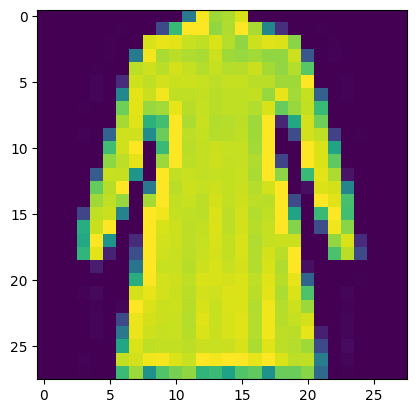

In [13]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Choose a random test image to predict
img_index = np.random.randint(0, x_test.shape[0])
test_img = x_test[img_index]

# Make the prediction
prediction = model.predict(np.array([test_img]))
predicted_class = np.argmax(prediction[0])

import matplotlib.pyplot as plt
# Print the result
print("Predicted class:", class_names[predicted_class])
plt.imshow(test_img)